# Исследование объявлений о продаже квартир

На основе данных сервиса Яндекс.Недвижимость (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет) определить рыночную стоимость объектов недвижимости и определить типичные параметры квартир.

### Шаг 1. Загрузка данных и изучение общей информации

Прочитаем файл real_estate_data.csv и сохраним его в переменной data.

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import display
import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
estate_data = data.copy() #копия датафрейма

Получение первых строк таблицы.

In [3]:
estate_data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Вывод общей информации о данных в таблице data.

In [4]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Рассмотрим полученную информацию подробнее.

Всего в таблице 23699 строк и 20 столбцов. Подробно разберём, какие имеются столбцы и какую информацию они содержат:

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)- тип данных float64;
balcony — число балконов- тип данных float64;
ceiling_height — высота потолков (м)- тип данных float64;
cityCenters_nearest — расстояние до центра города (м)- тип данных float64;
days_exposition — сколько дней было размещено объявление (от публикации до снятия)- тип данных float64;
first_day_exposition — дата публикации- тип данных object;
floor — этаж- тип данных int64;
floors_total — всего этажей в доме- тип данных float64;
is_apartment — апартаменты (булев тип)- тип данных object;
kitchen_area — площадь кухни в квадратных метрах (м²)- тип данных float64;
last_price — цена на момент снятия с публикации- тип данных float64;
living_area — жилая площадь в квадратных метрах(м²)- тип данных float64;
locality_name — название населённого пункта- тип данных object;
open_plan — свободная планировка (булев тип);
parks_around3000 — число парков в радиусе 3 км- тип данных float64;
parks_nearest — расстояние до ближайшего парка (м)- тип данных float64;
ponds_around3000 — число водоёмов в радиусе 3 км- тип данных float64;
ponds_nearest — расстояние до ближайшего водоёма (м)- тип данных float64;
rooms — число комнат- тип данных int64;
studio — квартира-студия (булев тип);
total_area — площадь квартиры в квадратных метрах (м²)- тип данных float64;
total_images — число фотографий квартиры в объявлении - тип данных int64;

Количество значений в столбцах различается. Это говорит о том, что в данных 14 столбцов есть пропущенные значения.

### Шаг 2. Предобработка данных

Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений.

In [5]:
print(estate_data.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


#### Пропуски в ceiling_height (высота потолков). 

In [6]:
estate_data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Заменим пропуски в столбце ceiling_height на медианное значение.

In [7]:
estate_data['ceiling_height'] = estate_data['ceiling_height'].fillna(estate_data.ceiling_height.median())

In [8]:
# Проверка пропусков
print(estate_data['ceiling_height'].isnull().sum())

0


#### Пропуски в balcony

In [9]:
#Список всех уникальных значений balcony
print(estate_data['balcony'].unique())

[nan  2.  0.  1.  5.  4.  3.]


Будем считать,что если человек не указал число балконов — скорее всего, их нет. Пропуски в столбце balcony заменим на 0. 

In [10]:
#замена попусков на 0
estate_data['balcony'] = estate_data['balcony'].fillna(0)

In [11]:
# Проверка, что нет пропусков
print(estate_data['balcony'].isnull().sum())

0


#### Пропуски в is_apartment

In [12]:
#Встречающиеся значения в is_apartment
print(estate_data['is_apartment'].value_counts())

False    2725
True       50
Name: is_apartment, dtype: int64


Большинство недвижимости это не аппартаменты, поэтому произведем замену пропусков на False.

In [13]:
estate_data['is_apartment'] = estate_data['is_apartment'].fillna(False)


In [14]:
# Проверка, что нет пропусков
print(estate_data['balcony'].isnull().sum())

0


In [15]:
#Встречающиеся значения в is_apartment
print(estate_data['is_apartment'].value_counts())

False    23649
True        50
Name: is_apartment, dtype: int64


#### Пропуски в locality_name
Подготовим данные в столбце locality_name для дальнейшего анализа. Т.к. в этом столбце 49 пропусков (0,2%), то можно удалить эти строки.

In [16]:
#удаление строк с пропусками
estate_data.dropna(subset=['locality_name'],inplace=True)

In [17]:
# Проверка, что нет пропусков
print(estate_data['locality_name'].isnull().sum())

0


In [18]:
#список всех значений в столбце locality_name
print(estate_data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Заметим, что есть повторяющиеся значения населенных пунктов, но разное написание 'посёлок' и 'поселок'. Исправим это.

In [19]:
#Замена ё на е
estate_data['locality_name'] = estate_data['locality_name'].str.replace('ё','е')

In [20]:
#Список населенных пунктов
print(estate_data['locality_name'].unique())

['Санкт-Петербург' 'поселок Шушары' 'городской поселок Янино-1'
 'поселок Парголово' 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'деревня Федоровское'
 'Выборг' 'Кронштадт' 'Кировск' 'деревня Новое Девяткино'
 'поселок Металлострой' 'поселок городского типа Лебяжье'
 'поселок городского типа Сиверский' 'поселок Молодцово'
 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок городского типа Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'

#### Пропуски в floors_total (всего этажей в доме)

In [21]:
#Числовое описание данных для столбца floors_total
print(estate_data['floors_total'].describe())

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


Большинство значений лежит в диапозоне от 5 до 16, но есть и выбросы. 
Замена пропусков на медианные значения с учетом населенного пункта

In [22]:
for loc_name in estate_data['locality_name'].unique():
    loc_name_median = estate_data[estate_data['locality_name']==loc_name]['floors_total'].median()
    estate_data.loc[(estate_data['floors_total'].isna())&(estate_data['locality_name']==loc_name),'floors_total'] = loc_name_median

Исключим случае, когда медианное значение получилось меньше, чем высота этажа.

In [23]:

def def_floors_total(row):
    if row['floor'] > row['floors_total']: return row['floor']
    else: return row['floors_total']
# Объявляется функция def_floors_total с одним параметром: row.
# Функция возвращает большее значение из  'floors_total'] и 'floor'
   
estate_data['floors_total'] = estate_data[['floor','floors_total']].apply(def_floors_total,axis=1) 
# В ячейках столбца floors_total запишем значения, возвращаемые функцией.
# Вызовим метод apply() для ДатаФреqма с двумя столбцами 'floor','floors_total', так как в нём содержатся данные, 
#которые функция примет на вход. 
# Аргументом метода станет сама функция def_floors_total, параметр axis=1,так как работать будем со строками

print(estate_data[['floor','floors_total']])

       floor  floors_total
0          8          16.0
1          1          11.0
2          4           5.0
3          9          14.0
4         13          14.0
...      ...           ...
23694      3           5.0
23695      4           5.0
23696      1           3.0
23697     12          17.0
23698      1           5.0

[23650 rows x 2 columns]


In [25]:
# Проверка, что не осталось пропусков
print(estate_data['floors_total'].isnull().sum())

0


In [26]:
# Проверка, что количество этажей в доме не превышает этаж продаваемой недвижимости
estate_data[estate_data['floor'] > estate_data['floors_total']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### Пропуски в airports_nearest (расстояние до ближайшего аэропорта в метрах (м))

In [27]:
#Числовое описание данных для столбца airport_nearest
print(estate_data['airports_nearest'].describe())

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64


Замена пропусков на медианные значения с учетом населенного пункта

In [28]:
for loc_name in estate_data['locality_name'].unique():
    loc_name_median = estate_data[estate_data['locality_name']==loc_name]['airports_nearest'].median()
    estate_data.loc[(estate_data['airports_nearest'].isna())&(estate_data['locality_name']==loc_name),'airports_nearest'] = loc_name_median

In [29]:
# Проверка, что не осталось пропусков
print(estate_data['airports_nearest'].isnull().sum())

4864


Пропусков осталось еще много, заменим средним по всем значениям столбца, разделив населенные пункты на Город и Область, так как аэропорт Пулково находится почти в середине Ленинградской области. Добавим новый столбец locality_group

In [30]:
estate_data['locality_group'] = 'Область'
estate_data.loc[estate_data['locality_name']=="Санкт-Петербург",'locality_group'] = 'Город'

Замена пропусков в airports_nearest на медианные значения Города и Области.

In [31]:
for loc_name in estate_data['locality_group'].unique():
    loc_name_median = estate_data[estate_data['locality_group']==loc_name]['airports_nearest'].median()
    estate_data.loc[(estate_data['airports_nearest'].isna())&(estate_data['locality_group']==loc_name),'airports_nearest'] = loc_name_median

In [32]:
# Проверка, что не осталось пропусков
print(estate_data['airports_nearest'].isnull().sum())

0


#### Пропуски в cityCenters_nearest (расстояние до центра города (м))

In [33]:
#Числовое описание данных для столбца cityCenters_nearest
print(estate_data['cityCenters_nearest'].describe())

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


Замена пропусков на медианные значения с учетом населенного пункта.

In [34]:

for loc_name in estate_data['locality_name'].unique():
    loc_name_median = estate_data[estate_data['locality_name']==loc_name]['cityCenters_nearest'].median()
    estate_data.loc[(estate_data['cityCenters_nearest'].isna())&(estate_data['locality_name']==loc_name),'cityCenters_nearest'] = loc_name_median

In [35]:
# Проверка, что не осталось пропусков
print(estate_data['cityCenters_nearest'].isnull().sum())

4864


Осталось слишком много пропусков. Заменим пропуски на медианные значения Города и Области.

In [36]:
for loc_name in estate_data['locality_group'].unique():
    loc_name_median = estate_data[estate_data['locality_group']==loc_name]['cityCenters_nearest'].median()
    estate_data.loc[(estate_data['cityCenters_nearest'].isna())&(estate_data['locality_group']==loc_name),'cityCenters_nearest'] = loc_name_median

In [37]:
# Проверка, что не осталось пропусков
print(estate_data['cityCenters_nearest'].isnull().sum())

0


#### Пропуски в parks_around3000 (число парков в радиусе 3 км)

In [38]:
#Числовое описание данных для столбца parks_around3000
print(estate_data['parks_around3000'].describe())

count    18140.000000
mean         0.611577
std          0.802003
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64


In [39]:
# Статистика значений
print(estate_data['parks_around3000'].value_counts())

0.0    10080
1.0     5671
2.0     1744
3.0      645
Name: parks_around3000, dtype: int64


Заметим, что более половины значений это нули.

Замена пропусков на медианные значения с учетом населенного пункта.

In [40]:

for loc_name in estate_data['locality_name'].unique():
    loc_name_median = estate_data[estate_data['locality_name']==loc_name]['parks_around3000'].median()
    estate_data.loc[(estate_data['parks_around3000'].isna())&(estate_data['locality_name']==loc_name),'parks_around3000'] = loc_name_median

In [41]:
# Проверка, что не осталось пропусков
print(estate_data['parks_around3000'].isnull().sum())

4864


Пропусков осталось очень много. Так как данные о количестве парков не повлияют на результат анализа, заменим пропуски на медианные значения Города и Области.

In [42]:
for loc_name in estate_data['locality_group'].unique():
    loc_name_median = estate_data[estate_data['locality_group']==loc_name]['parks_around3000'].median()
    estate_data.loc[(estate_data['parks_around3000'].isna())&(estate_data['locality_group']==loc_name),'parks_around3000'] = loc_name_median

In [43]:
# Проверка, что не осталось пропусков
print(estate_data['parks_around3000'].isnull().sum())

0


In [44]:
# Статистика значений
print(estate_data['parks_around3000'].value_counts())

0.0    15589
1.0     5671
2.0     1745
3.0      645
Name: parks_around3000, dtype: int64


Все пропуски заменились на нули.

#### Пропуски в ponds_around3000 (число водоёмов в радиусе 3 км)

In [45]:
#Числовое описание данных для столбца ponds_around3000
print(estate_data['ponds_around3000'].describe())

count    18140.000000
mean         0.769680
std          0.937948
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64


In [46]:
# Статистика значений
print(estate_data['ponds_around3000'].value_counts())

0.0    9055
1.0    5702
2.0    1889
3.0    1494
Name: ponds_around3000, dtype: int64


Заметим, что более половины значений это нули.

Замена пропусков на медианные значения с учетом населенного пункта.

In [47]:
for loc_name in estate_data['locality_name'].unique():
    loc_name_median = estate_data[estate_data['locality_name']==loc_name]['parks_around3000'].median()
    estate_data.loc[(estate_data['parks_around3000'].isna())&(estate_data['locality_name']==loc_name),'parks_around3000'] = loc_name_median

In [48]:
# Проверка, что не осталось пропусков
print(estate_data['ponds_around3000'].isnull().sum())

5510


Так как данные о количестве парков не повлияют на результат анализа, заменим пропуски на медианные значения Города и Области. 

In [49]:
for loc_name in estate_data['locality_group'].unique():
    loc_name_median = estate_data[estate_data['locality_group']==loc_name]['ponds_around3000'].median()
    estate_data.loc[(estate_data['ponds_around3000'].isna())&(estate_data['locality_group']==loc_name),'ponds_around3000'] = loc_name_median

In [50]:
# Проверка, что не осталось пропусков
print(estate_data['ponds_around3000'].isnull().sum())

0


In [51]:
# Статистика значений
print(estate_data['ponds_around3000'].value_counts())

0.0    14504
1.0     5763
2.0     1889
3.0     1494
Name: ponds_around3000, dtype: int64


#### Пропуски в parks_nearest (расстояние до ближайшего парка (м))

Замена пропусков на медианные значения с учетом населенного пункта

In [52]:

for loc_name in estate_data['locality_name'].unique():
    loc_name_median = estate_data[estate_data['locality_name']==loc_name]['parks_nearest'].median()
    estate_data.loc[(estate_data['parks_nearest'].isna())&(estate_data['locality_name']==loc_name),'parks_nearest'] = loc_name_median

In [53]:
# Проверка, что не осталось пропусков
print(estate_data['parks_nearest'].isnull().sum())

5998


Остальные пропуски оставим, так как медианные значения по областям и Санкт-Петербургу будут слишком искажать результаты расстояния в метрах до ближайшего парка.

#### Пропуски в ponds_nearest (расстояние до ближайшего водоёма (м))

Замена пропусков на медианные значения с учетом населенного пункта

In [54]:
for loc_name in estate_data['locality_name'].unique():
    loc_name_median = estate_data[estate_data['locality_name']==loc_name]['ponds_nearest'].median()
    estate_data.loc[(estate_data['ponds_nearest'].isna())&(estate_data['locality_name']==loc_name),'ponds_nearest'] = loc_name_median

In [55]:
# Проверка, что не осталось пропусков
print(estate_data['parks_nearest'].isnull().sum())

5998


Остальные пропуски оставим, так как медианные значения по областям и Санкт-Петербургу будут слишком искажать результаты расстояния в метрах до ближайшего водоема.

#### Пропуски в living_area  (жилая площадь в квадратных метрах(м²))

Заполним пропуски в столбце учитывая данные total_area— площадь квартиры в квадратных метрах (м²). Будем использовать коэффициент отношения жилой площади к общей площади квартиры coef_living.

In [56]:
print(estate_data[['living_area','total_area']].head()) 

   living_area  total_area
0         51.0       108.0
1         18.6        40.4
2         34.3        56.0
3          NaN       159.0
4         32.0       100.0


In [57]:
#Нахождение коэффициента как среднее значение всех соотношений
coef_living = (estate_data['living_area'] / estate_data['total_area']).mean()
print('Коэффициент отношения жилой площади к общей площади квартиры:',coef_living)

Коэффициент отношения жилой площади к общей площади квартиры: 0.5647499988246625


In [58]:
# Заполнение пропусков
estate_data['living_area'] = estate_data['living_area'].fillna(estate_data['total_area']*coef_living)

In [59]:
# Проверка, что не осталось пропусков
print(estate_data['living_area'].isnull().sum())

0


In [60]:
print(estate_data[['living_area','total_area']].head())

   living_area  total_area
0     51.00000       108.0
1     18.60000        40.4
2     34.30000        56.0
3     89.79525       159.0
4     32.00000       100.0


#### Пропуски в kitchen_area (площадь кухни в квадратных метрах (м²))

Заполним пропуски в столбце учитывая данные total_area— площадь квартиры в квадратных метрах (м²). Будем использовать коэффициент отношения жилой площади к общей площади квартиры coef_kitchen.

In [61]:
#Нахождение коэффициента как среднее значение всех соотношений
coef_kitchen = (estate_data['kitchen_area'] / estate_data['total_area']).mean()
print('Коэффициент отношения площади кухни к общей площади квартиры:',coef_kitchen)

Коэффициент отношения площади кухни к общей площади квартиры: 0.18737152810064303


In [62]:
# Заполнение пропусков
estate_data['kitchen_area'] = estate_data['kitchen_area'].fillna(estate_data['total_area']*coef_living)

In [63]:
# Проверка, что не осталось пропусков
print(estate_data['kitchen_area'].isnull().sum())

0


#### Пропуски days_exposition (сколько дней было размещено объявление (от публикации до снятия))

In [64]:
# Статистика значений
print(estate_data['days_exposition'].describe())

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


Разброс значений очень большой: от 1 до 1580 дней.

Прежде чем заменять пропуски, необходимо уточнить у заказчика какие именно данные представлены для анализа, т.е.пропуски могут быть логичными, так как недвижимость еще не продалась, или же данные представлены только по проданной недвижимости, тогда есть смысл заменить пропуски.  Нам представлен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет, тогда будем считать, что недвижимость продана. Заменим пропуски медианными значениями с учетом населенного пункта и количества комнат в квартире, так как эти параметры очень влияют на покупку недвижимости.

In [65]:
#Встречающиеся значения количества комнат
print(estate_data['rooms'].value_counts())

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64


In [66]:
# Заменим пропуски медианными значениями с учетом населенного пункта и количества комнат в квартире
for loc_name in estate_data['locality_name'].unique():
    for rooms in estate_data['rooms'].unique():
        loc_name_median = estate_data[(estate_data['locality_name']==loc_name)&(estate_data['rooms'] == rooms)]['days_exposition'].median()
        estate_data.loc[(estate_data['days_exposition'].isna())&(estate_data['locality_name']==loc_name)&(estate_data['rooms'] == rooms),'days_exposition'] = loc_name_median

In [67]:
# Проверка, что не осталось пропусков
print(estate_data['days_exposition'].isnull().sum())

131


Остался 131 пропуск, удалим эти строки.

In [68]:
#удаление строк с пропусками
estate_data.dropna(subset=['days_exposition'],inplace=True)

In [69]:
# Проверка, что не осталось пропусков
print(estate_data['days_exposition'].isnull().sum())

0


Проверка оставшихся пропусков во всей таблице.

In [70]:
print(estate_data.isnull().sum())

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest           5870
ponds_around3000           0
ponds_nearest           4845
days_exposition            0
locality_group             0
dtype: int64


Пропуски в столбцах parks_nearest, ponds_nearest оставили сознательно.

## Замена типа данных

In [71]:
print(estate_data.dtypes)

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
locality_group           object
dtype: object


Заметим, что тип данных столбца is_apartment изменился на булевый после использования fillna(False)

Заменим вещественный тип данных на целочисленный в следующих столбцах: balcony, floors_total, parks_around3000, ponds_around3000, days_exposition, last_price.

In [72]:
estate_data['balcony'] = estate_data['balcony'].astype('int')
estate_data['days_exposition'] = estate_data['days_exposition'].astype('int')
estate_data['floors_total'] = estate_data['floors_total'].astype('int')
estate_data['parks_around3000'] = estate_data['parks_around3000'].astype('int')
estate_data['ponds_around3000'] = estate_data['ponds_around3000'].astype('int')
estate_data['last_price'] = estate_data['last_price'].astype('int')

Сейчас значения в столбце first_day_exposition (дата публикации) — это строки (тип данных object). Методом to_datetime() заменим содержимое этого столбца в даты.


In [73]:
# Вывод первых строк столбца first_day_exposition
print(estate_data['first_day_exposition'].head())

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object


Сейчас значения в столбце first_day_exposition (дата публикации) тип данных object (строки). Методом to_datetime() заменим содержимое этого столбца в даты.

In [74]:
estate_data['first_day_exposition']= pd.to_datetime(estate_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [75]:
# Проверка замены типа данных
print(estate_data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


Проверка окончательных типов данных всей таблицы:

In [76]:
print(estate_data.dtypes)

total_images                     int64
last_price                       int32
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 int32
parks_nearest                  float64
ponds_around3000                 int32
ponds_nearest                  float64
days_exposition                  int32
locality_group                  object
dtype: object


## Обработка дубликатов

Необходимо установить наличие дубликатов. Если найдутся, удаляем, и проверяем, все ли удалились.

In [77]:
print(estate_data.duplicated().sum())
#получение суммарного количества дубликатов в таблице data

0


Дубликатов нет.

### Шаг 3. Расчет дополнительных данных

#### Найдем цену квадратного метра

Создаем столбец price_m как отношение цены квартиры к общей площади 

In [78]:
# создаем столбец как отношение столбца last_price  к столбцу total_area
estate_data['price_m'] = estate_data['last_price'] / estate_data['total_area']
print(estate_data[['last_price','total_area','price_m']].head())

   last_price  total_area        price_m
0    13000000       108.0  120370.370370
1     3350000        40.4   82920.792079
2     5196000        56.0   92785.714286
3    64900000       159.0  408176.100629
4    10000000       100.0  100000.000000


#### Определим день недели, месяц и год публикации объявления

In [79]:
# Создание столбца День недели first_day_exposition_day
estate_data['first_day_exposition_weekday'] = estate_data['first_day_exposition'].dt.weekday
print(estate_data[['first_day_exposition_weekday']].head())

   first_day_exposition_weekday
0                             3
1                             1
2                             3
3                             4
4                             1


In [80]:
# Создание столбца Месяц first_day_exposition_month
estate_data['first_day_exposition_month'] = estate_data['first_day_exposition'].dt.month
print(estate_data[['first_day_exposition_month']].head())

   first_day_exposition_month
0                           3
1                          12
2                           8
3                           7
4                           6


In [81]:
# Создание столбца Год first_day_exposition_yer
estate_data['first_day_exposition_year'] = estate_data['first_day_exposition'].dt.year
estate_data[['first_day_exposition_year']].head()

,first_day_exposition_year
0,2019
1,2018
2,2015
3,2015
4,2018


#### Категоризация этажей: — первый, последний, другой

In [82]:
estate_data[['floor','floors_total']].head()

,floor,floors_total
0,8,16
1,1,11
2,4,5
3,9,14
4,13,14


In [83]:
# Определим функцию, разделяющую данные об этаже квартиры по категориям -  первый, последний, другой
def def_floor_category(row):
    if row['floor'] == row['floors_total']: return 'Последний'
    elif row['floor'] == 1: return 'Первый'
    else: return 'Другой'
# Определяется функция def_floor_category с одним параметром row
# Функция возвращает значение:
#'Последний' -если этаж квартиры равен количеству этажей в доме,
# 'Первый' - если квартира на первом этаже,
# 'Другой' - в остальных случаях.

In [84]:
# Создадим столбец floor_category с информацией об этаже -  первый, последний, другой
estate_data['floor_category'] = estate_data[['floor','floors_total']].apply(def_floor_category,axis=1)
estate_data[['floor','floors_total','floor_category']].head(13)

,floor,floors_total,floor_category
0,8,16,Другой
1,1,11,Первый
2,4,5,Другой
3,9,14,Другой
4,13,14,Другой
5,5,12,Другой
6,6,26,Другой
7,22,24,Другой
8,26,27,Другой
9,7,9,Другой


#### Найдем соотношение жилой и общей площади, а также отношение площади кухни к общей

In [85]:
# создаем столбец соотношения жилой и общей площади living_k_total 
estate_data['living_k_total'] = estate_data['living_area'] / estate_data['total_area']

In [86]:
# создаем столбец соотношения площади кухни к общей kitchen_k_total
estate_data['kitchen_k_total'] = estate_data['kitchen_area'] / estate_data['total_area']

In [87]:
estate_data[['living_k_total','kitchen_k_total']].head()

,living_k_total,kitchen_k_total
0,0.472222,0.231481
1,0.460396,0.272277
2,0.612500,0.148214
3,0.564750,0.564750
4,0.320000,0.410000


### Шаг 4. Исследовательский анализ данных

#### Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

##### площадь (total_area — площадь квартиры в квадратных метрах (м²))

In [88]:
#Числовое описание данных
print(estate_data['total_area'].describe())

count    23519.000000
mean        60.337857
std         35.696800
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


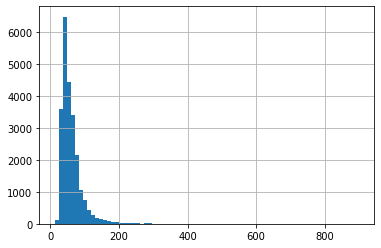

In [89]:
# Построение гистограммы
estate_data['total_area'].hist(bins=75)

Площадь квартиры: среднее =60,3 м²; медиана = 52 м². Самые распространенные квартиры с площадью около 52 м². Очень редко встречаются квартиры с площадью меньше 12м² и большей 69,7 м².

##### цена (last_price — цена на момент снятия с публикации)

In [90]:
#Числовое описание данных
print(estate_data['last_price'].describe())

count    2.351900e+04
mean     6.560436e+06
std      1.092212e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


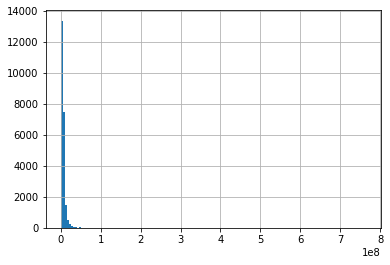

In [91]:
# Построение гистограммы
estate_data['last_price'].hist(bins=150)

Цена: средняя = 6560436, медиана = 4650000. Обычно квартиры продают за стоимость от 3450000 до 6800000.

##### число комнат (rooms — число комнат)

In [92]:
#Числовое описание данных
print(estate_data['rooms'].describe())

count    23519.000000
mean         2.068328
std          1.077552
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


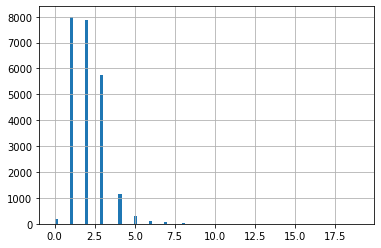

In [93]:
# Построение гистограммы
estate_data['rooms'].hist(bins=100)

Число комнат: среднее значение совпадает с медианным, равным 2. Чаще всего продают 1-2-3-комнатные квартиры. Квартиры с комнатами более 3 продают очень редко.

##### высота потолков (ceiling_height — высота потолков (м))

In [94]:
#Числовое описание данных
print(estate_data['ceiling_height'].describe())

count    23519.000000
mean         2.724827
std          0.991940
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


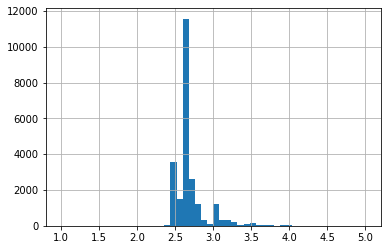

In [95]:
# Построение гистограммы
estate_data['ceiling_height'].hist(bins=50, range=(1,5))

Среднее значение высоты потолка 2,72 не очень отличается от медианного 2,65. В основном в квартирах высота потолков от 2,6 до 2,7 метра.

#### Изучим время продажи квартиры.Опишем сколько обычно занимает продажа. 

Время продажи квартиры - количество дней размещения объявления от публикации до снятия (days_exposition).

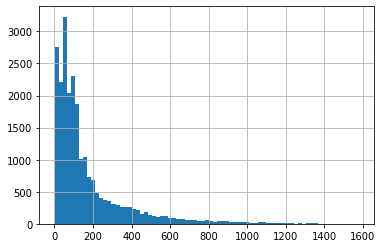

In [96]:
# Построение гистограммы
estate_data['days_exposition'].hist(bins=75)

In [97]:
# Числовое описание данных
print(estate_data['days_exposition'].describe())

count    23519.000000
mean       171.827544
std        207.513286
min          1.000000
25%         45.000000
50%         95.000000
75%        203.000000
max       1580.000000
Name: days_exposition, dtype: float64


Время продажи квартиры: среднее = 172 дня , медиана = 95 дней. Среднее значительно отличается от медианы, так как встречаются "выбросы" (продажа до 1580 дней). Обычно продажа занимает 95 дней. Можно считать, что продажи прошли очень быстро, если квартиры проданы в течение 45 дней. Если же продажи длятся более 203 дней, то это уже считается необычно долго.

#### Уберем редкие и выбивающиеся значения

Так анализировать зависимость цены квартиры будем по следующим параметрам:квадратура квартиры (total_area), числа комнат (rooms), удалённость от центра (cityCenters_nearest), то поэтим же параметрам проверим редкие и выбивающиеся значения. Создадим новую таблицу estate_data_new без "выбросов".

Исследуем на "выбросы" общую площадь недвижимости.

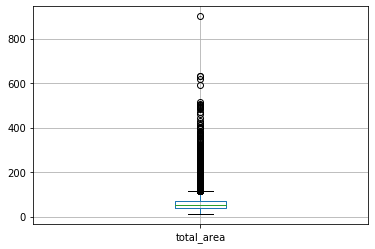

In [98]:
# Отображение диаграммы ящик с усами 
estate_data[['total_area']].boxplot()
plt.show()

Уберем редкие и выбивающиеся значения, т.е.те значения, которые попадают за диаграмму размаха.

count    23519.000000
mean        60.337857
std         35.696800
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64
22279


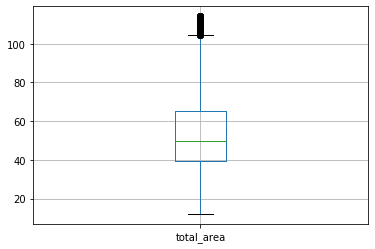

In [99]:
#удалим из estate_data_new редкие и выбивающиеся значения

describe_total_area = estate_data['total_area'].describe().T
q1_total_area = describe_total_area['25%'] # первый квартиль
q3_total_area = describe_total_area['75%'] # третий квартиль
iqr_total_area = q3_total_area - q1_total_area  # межквартильный размах

# в размах усов попадают нормальные значения, а за пределами находятся выбросы
estate_data_new = estate_data.query('(@q1_total_area-1.5*(@iqr_total_area)) <= total_area <= (@q3_total_area+1.5*(@iqr_total_area))')

print(describe_total_area)
print(len(estate_data_new))

# Отображение диаграммы ящик с усами 
estate_data_new[['total_area']].boxplot()


Исследуем на "выбросы" число комнат.

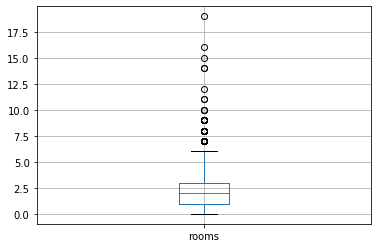

In [100]:
# Отображение диаграммы ящик с усами 
estate_data[['rooms']].boxplot()
plt.show()

Уберем редкие и выбивающиеся значения, т.е.те значения, которые попадают за диаграмму размаха.

count    23519.000000
mean         2.068328
std          1.077552
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
22278


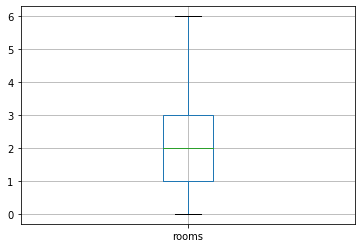

In [101]:
#удалим из estate_data_new редкие и выбивающиеся значения

describe_rooms = estate_data['rooms'].describe().T
q1_rooms = describe_rooms['25%'] # первый квартиль
q3_rooms = describe_rooms['75%'] # третий квартиль
iqr_rooms = q3_rooms - q1_rooms  # межквартильный размах

# в размах усов попадают нормальные значения, а за пределами находятся выбросы
estate_data_new = estate_data_new.query('(@q1_rooms-1.5*(@iqr_rooms)) <= rooms <= (@q3_rooms+1.5*(@iqr_rooms))')

print(describe_rooms)
print(len(estate_data_new))

# Отображение диаграммы ящик с усами 
estate_data_new[['rooms']].boxplot()


Исследуем на "выбросы" удаленность от центра.

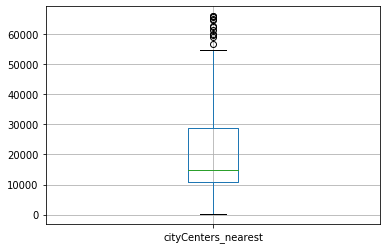

In [102]:
# Отображение диаграммы ящик с усами 
estate_data[['cityCenters_nearest']].boxplot()
plt.show()

Уберем редкие и выбивающиеся значения, т.е.те значения, которые попадают за диаграмму размаха.

count    23519.000000
mean     17370.816786
std       9635.749595
min        181.000000
25%      10899.500000
50%      14930.000000
75%      28963.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64
22266


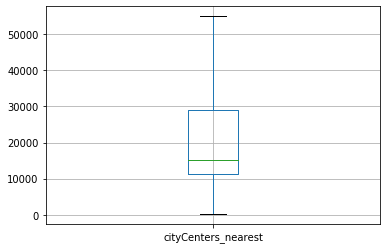

In [103]:
#удалим из estate_data_new редкие и выбивающиеся значения

describe_cityCenters_nearest = estate_data['cityCenters_nearest'].describe().T
q1_cityCenters_nearest = describe_cityCenters_nearest['25%'] # первый квартиль
q3_cityCenters_nearest = describe_cityCenters_nearest['75%'] # третий квартиль
iqr_cityCenters_nearest = q3_cityCenters_nearest - q1_cityCenters_nearest  # межквартильный размах

# в размах усов попадают нормальные значения, а за пределами находятся выбросы
estate_data_new = estate_data_new.query('(@q1_cityCenters_nearest-1.5*(@iqr_cityCenters_nearest)) <= cityCenters_nearest <= (@q3_cityCenters_nearest+1.5*(@iqr_cityCenters_nearest))')

print(describe_cityCenters_nearest)
print(len(estate_data_new))

# Отображение диаграммы ящик с усами 
estate_data_new[['cityCenters_nearest']].boxplot()

#### Изучим какие факторы больше всего влияют на стоимость квартиры

Проведем анализ полученной таблицы без выбросов estate_data_new.

###### Зависит ли цена от квадратного метра? 

In [104]:
# Вычислим коэффициент корреляции Пирсона
print(estate_data_new['last_price'].corr(estate_data_new['total_area']))

0.6838359056525831


Корреляция в 0,68 говорит о наличии связи, т.е. с увеличением площади квартиры ее стоимость тоже увеличивается.

###### Зависит ли цена от числа комнат?

In [105]:
# Вычислим коэффициент корреляции Пирсона
print(estate_data_new['last_price'].corr(estate_data_new['rooms']))

0.38791838186585115


Корреляция в 0,39 говорит об очень малой зависимости, т.е. с увеличением количества комнат квартиры ее стоимость не обязательно увеличивается.

###### Зависит ли цена от удалённости от центра?

In [106]:
print(estate_data_new['last_price'].corr(estate_data_new['cityCenters_nearest']))

-0.47611995552978575


Корреляция в -0,47 говорит о наличии обратной связи, однако не слишком сильной. Чем ближе к центру, тем квартиры дороже, но так бывает не всегда.

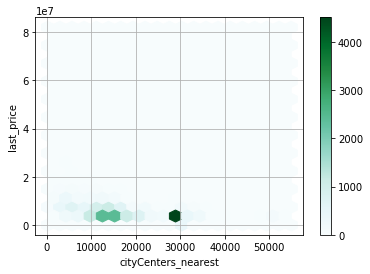

In [107]:
#Проиллюстрируем нашу догадку графиком
estate_data_new.plot(x='cityCenters_nearest', y='last_price', kind='hexbin', gridsize=20, sharex=False, grid=True)

Действительно, «густые» зоны сосредоточены не только в центре.

###### Рассмотрим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

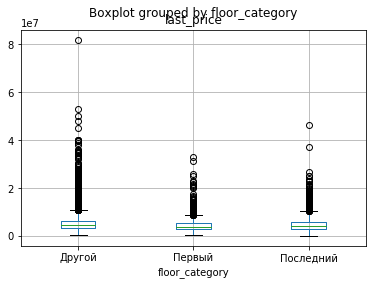

In [108]:
# отобразим диаграмму размаха
estate_data_new.boxplot('last_price',by='floor_category')
plt.show()

По диаграмме размаха можно сделать вывод, что стоимость квартиры мало зависит от того на каком этаже расположена квартира, но все же квартиры, расположенных не на первом и не на последнем этажах, стоят дороже.

###### Рассмотрим зависимость цены от даты размещения: дня недели first_day_exposition_weekday

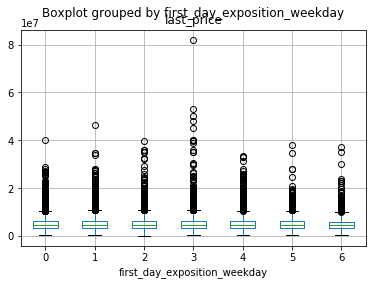

In [109]:
# отобразим диаграмму размаха
estate_data_new.boxplot('last_price',by='first_day_exposition_weekday')
plt.show()

По диаграмме размаха можно сделать вывод, что стоимость квартиры мало зависит от того в какой день было размещено объявление.

###### Рассмотрим зависимость цены от даты размещения: месяца first_day_exposition_month

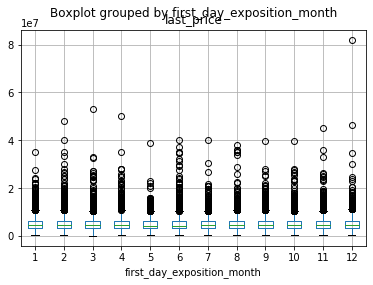

In [110]:
# отобразим диаграмму размаха
estate_data_new.boxplot('last_price',by='first_day_exposition_month')
plt.show()

По диаграмме размаха можно сделать вывод, что стоимость квартиры мало зависит от того в какой месяц было размещено объявление.

###### Рассмотрим зависимость цены от даты размещения: года first_day_exposition_year

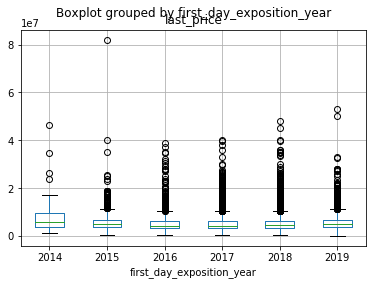

In [111]:
# отобразим диаграмму размаха
estate_data_new.boxplot('last_price',by='first_day_exposition_year')
plt.show()

По диаграмме размаха можно сделать вывод, что стоимость квартиры в 2014 году заметно выше, чем в последующих годах, причем в этом году и выбросов практически нет. После 2014 года наблюдается спад в ценах на квартиры, а  с 2018 цены опять стали немного расти.

#### Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем в них среднюю цену квадратного метра. Найдем населённые пункты с самой высокой и низкой стоимостью жилья. 

In [112]:
max_locality_name = (estate_data
                     .groupby('locality_name') #группируем по названию населенного пункта
                     .agg({'total_area':'count','price_m':'mean'}) #подсчитываем количество объявлений и находим среднюю цену м²
                     .sort_values(by='total_area',ascending=False) # сортируем по кол-ву объявлений
                     .rename(columns={'total_area':'count_sale'}) # переименовываем столбец с кол-вом объявлений
                    )
print(max_locality_name.head(10))

                   count_sale        price_m
locality_name                               
Санкт-Петербург         15721  114849.008794
поселок Мурино            556   85681.762601
поселок Шушары            440   78677.364217
Всеволожск                398   68654.473986
Пушкин                    369  103125.819291
Колпино                   338   75424.579098
поселок Парголово         327   90175.913458
Гатчина                   307   68746.146763
деревня Кудрово           299   92473.547576
Выборг                    237   58141.909153


Наибольшее число объявлений о продаже в Санкт-Петербурге, здесь же самая высокая стоимость квадратного метра. Самая низкая стоимость жилья (в выборке 10 населённых пунктов с наибольшим числом объявлений) в Выборге.

#### Выделим квартиры в Санкт-Петербурге и выясним какая область входит в центр.

In [113]:
# Выделим квартиры в Санкт-Петербурге 
locality_Saint_Petersburg = estate_data.query('locality_name == "Санкт-Петербург"')
#создаем столбец с расстоянием до центра в километрах
locality_Saint_Petersburg['cityCenters_nearest_km'] = locality_Saint_Petersburg['cityCenters_nearest'] // 1000

print(locality_Saint_Petersburg[['cityCenters_nearest_km']].head())

   cityCenters_nearest_km
0                    16.0
2                    13.0
3                     6.0
4                     8.0
7                    11.0


Посчитаем среднюю цену для каждого километра.

In [114]:
#Создаем столбец со средней ценой для каждого километра (округлим значение до 2х знаков после запятой)
locality_Saint_Petersburg['price_m_km'] = (locality_Saint_Petersburg['price_m'] / locality_Saint_Petersburg['cityCenters_nearest_km']).round(2)
print(locality_Saint_Petersburg[['price_m_km']].head())

   price_m_km
0     7523.15
2     7137.36
3    68029.35
4    12500.00
7    10049.52


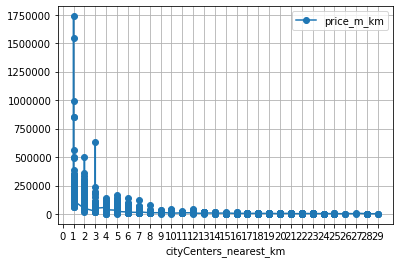

In [115]:
# строим график как цена price_m_km зависит от удалённости от центра cityCenters_nearest_km
locality_Saint_Petersburg.sort_values(by='cityCenters_nearest_km').plot(style='o-',x='cityCenters_nearest_km',y='price_m_km',xticks=range(0,30,1),grid=True)
plt.show()


График сильно меняется при расстояние более 3х км — это и будет центральная зона.

#### Выделим сегмент квартир в центре и изучим следующие параметры: площадь, цена, число комнат, высота потолков

Выделим сегмент квартир в центре. 

In [116]:
estate_date_centre = locality_Saint_Petersburg.query('cityCenters_nearest_km < 3') # квартиры в радиусе 3-х км
estate_date_centre[['cityCenters_nearest_km']]

,cityCenters_nearest_km
24,2.0
99,2.0
138,2.0
155,1.0
179,2.0
...,...
23395,2.0
23399,1.0
23400,1.0
23602,2.0


Изучим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сравним полученные выводы с выводами по всему городу.

###### Изучим площадь квартир в центральной зоне.

In [117]:
estate_date_centre['total_area'].describe()

count    633.000000
mean     102.261011
std       59.752579
min       12.000000
25%       65.000000
50%       87.000000
75%      120.500000
max      517.000000
Name: total_area, dtype: float64

Площадь квартиры: среднее =102,5 м²; медиана = 87 м². Самые распространенные квартиры с площадью около 87 м². Очень редко встречаются квартиры с площадью меньше 12 м² и большей 120 м².

Заметим, что площадь квартир в центре (87 м²) значительно больше, чем площадь квартир по всему городу (52 м²). Самое комфортное жилье в центре.

###### Изучим цену квартир в центральной зоне.

In [118]:
estate_date_centre['last_price'].describe()

count    6.330000e+02
mean     1.817122e+07
std      3.033816e+07
min      2.100000e+06
25%      7.590000e+06
50%      1.010000e+07
75%      1.580000e+07
max      4.013000e+08
Name: last_price, dtype: float64

Цена: средняя = 18171220, медиана = 10100000. Обычно квартиры продают за стоимость от 2100000 до 15800000. Заметим, что цена квартир в центре более чем в 2 раза выше, чем по всему городу.

###### Изучим количество комнат в квартире в центральной зоне.

In [119]:
estate_date_centre['rooms'].describe()

count    633.000000
mean       3.175355
std        1.517584
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       14.000000
Name: rooms, dtype: float64

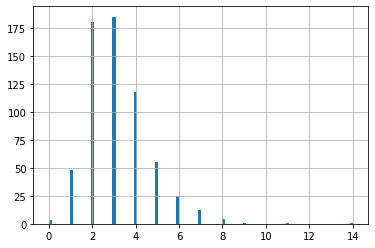

In [120]:
# Построение гистограммы
estate_date_centre['rooms'].hist(bins=100)

Число комнат: среднее значение совпадает с медианным, равным 3. Чаще всего в центре встречаются 2-3-комнатные квартиры, реже 4-х комнатные, в то время как по всему городу чаще встречаются 1-2-комнатные и вообще редко квартиры с более чем 3мя комнатами.

###### Изучим высоту потолков в центральной зоне.

In [121]:
estate_date_centre['ceiling_height'].describe()

count    633.000000
mean       3.067172
std        0.429589
min        2.500000
25%        2.650000
50%        3.000000
75%        3.330000
max        5.800000
Name: ceiling_height, dtype: float64

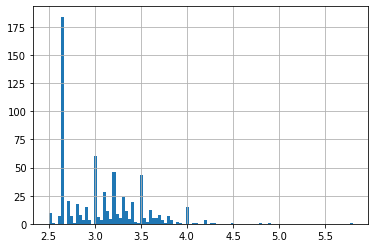

In [122]:
# Построение гистограммы
estate_date_centre['ceiling_height'].hist(bins=100)

Среднее значение высоты потолка 3,1 м почти равно медианному 3 м. На гистограмме явно выделяются квартиры с высотой потолка 2,65м, скорее всего это из-за замены пропусков на медианное значение. В целом можно видеть, что в центре города потолки в квартирах выше, чем в общем по городу.


Итак, в центре города квартиры стоят дороже. В этих квартирах и площадь больше, и комнат больше, и потолки выше.

###### Влияет на стоимость квартиры число комнат?

In [123]:
# Вычислим коэффициент корреляции Пирсона
print(estate_date_centre['last_price'].corr(estate_date_centre['rooms']))

0.23080089693319333


Корреляция в 0,23 говорит что, количество комнат квартиры не влияют на ее стоимость, причем коэффициент корреляции для квартир в центре еще меньше, чем коэффициент корреляции в целом по городу (0,39).

###### Влияет на стоимость квартиры удалённость от центра?

In [124]:
print(estate_date_centre['last_price'].corr(estate_date_centre['cityCenters_nearest']))

-0.12459928577414672


Корреляция в -0,12 говорит об отсутствии зависимости стоимости квартиры от удаленности от центра. Это и не удивительно: мы рассматриваем только квартиры, расположенные близко к центру. В целом по городу прослеживается небольшая закономерность: чем ближе к центру, тем квартиры дороже.

###### Влияет на стоимость квартиры этаж?

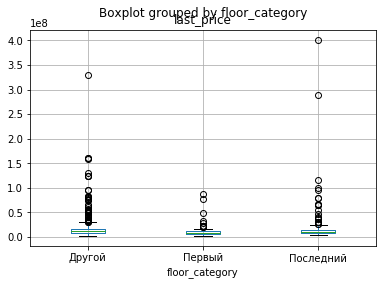

In [125]:
# отобразим диаграмму размаха
estate_date_centre.boxplot('last_price',by='floor_category')
plt.show()

По диаграмме размаха квартир в центре похожа на диаграмму квартир в целом по городу.можно Квартиры, расположенные не на первом и не на последнем этажах, стоят дороже.

###### Влияет на стоимость квартиры дата размещения объявления?

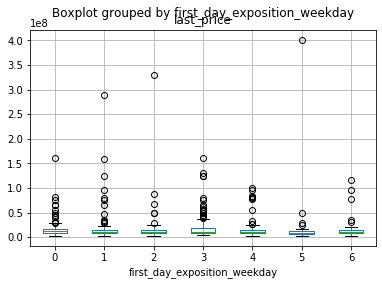

In [126]:
# отобразим диаграмму размаха
estate_date_centre.boxplot('last_price',by='first_day_exposition_weekday')
plt.show()

По диаграмме размаха можно сделать вывод, что чаще всего более дорогие объявления по квартирам размещают в понедельник и четверг. В целом по городу связи не наблюдается.

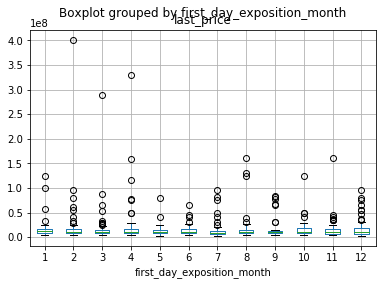

In [127]:
# отобразим диаграмму размаха
estate_date_centre.boxplot('last_price',by='first_day_exposition_month')
plt.show()

По диаграмме размаха можно сделать вывод, что спад на стоимость квартир наблюдается в мае,июле и декабре, т.е. чаще на периоды праздников (май, Новый год) и отпусков(май, июль). В целом по городу стоимость квартир не зависит от месяца размещения объявления.

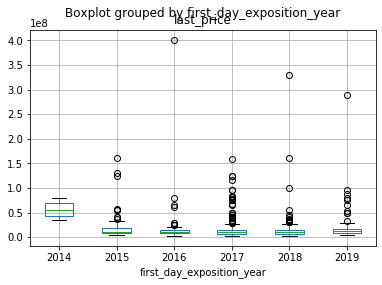

In [128]:
# отобразим диаграмму размаха
estate_date_centre.boxplot('last_price',by='first_day_exposition_year')
plt.show()

По диаграмме размаха можно сделать вывод, что стоимость квартир в центре в 2014 году заметно выше, чем в последующих годах, причем в этом году и выбросов нет. После 2014 года наблюдается спад в ценах на квартиры, а  с 2019 цены опять стали немного расти. Похожая закономерность и для квартир в целом по городу.

### Шаг 5. Общий вывод

Итак, мы рассмотрели архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 
Провели анализ факторов, влияющих на стоимость квартиры. Стоимость квартиры зависит от удалённости от центра, общей площади, этажа, совсем не зависит от количества комнат в квартире, дата размещения зависит в большей степени для квартир в центре города. Особенно дорогие квартиры находятся в самом центре, в них же больше площадь, высота потолков, количество комнат.
Явный пик подорожания квартир приходится на 2014 год, после наблюдался спад в цене.
Рыночную стоимость объектов недвижимости можно определить исходя из медианных значений схожих по расположению и параметрам квартир. Квартиры с сильно выбивающимися значениями можно принять за аномалию или мошенническую деятельность.
